<a href="https://colab.research.google.com/github/Hikachhu/ProgGPU/blob/main/TD3_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()


<Figure size 432x288 with 0 Axes>

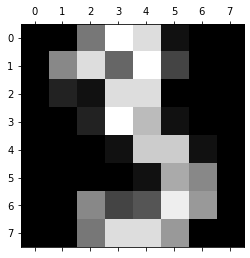

In [7]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[3]) #index est le numéro de l’image
plt.show()

In [8]:
X = digits.data
y = digits.target

In [20]:
import numpy as np
from matplotlib import pyplot
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter
import matplotlib.pyplot as plt
import time
import statistics
simplefilter("ignore", category=ConvergenceWarning)


In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,train_size=0.7,test_size=0.3)

In [41]:
def train_multi(C,early_stop):
  clf2 = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='constant', max_iter=100, momentum=0,early_stopping=early_stop)
  clf2.fit(X_train,y_train)
  return clf2

final cost : 1.7889339693998798 / it = 86
final cost : 1.7532043844594865 / it = 100
final cost : 0.8263128294046665 / it = 92
final cost : 0.45723863076145993 / it = 92
final cost : 0.4993311044533701 / it = 100
final cost : 0.3233003390203914 / it = 78
final cost : 0.12544568518218224 / it = 100
final cost : 0.16162136480260714 / it = 100
final cost : 0.06000735064853029 / it = 100


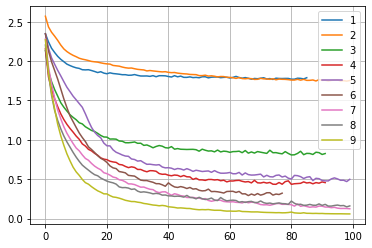

In [39]:
clfTotal=[]
clfScoreTrain=[]
clfScoreTest=[]
for i in range(1,10):
  clf=train_multi(i)
  loss_values = clf.loss_curve_
  plt.plot(clf.loss_curve_,label=str(i))
  plt.grid()
  plt.legend()
  clfScoreTrain.append(clf.score(X_train,y_train))
  clfScoreTest.append(clf.score(X_test,y_test))
  print("final cost : {} / it = {}".format(loss_values[-1],len(loss_values)))

In [40]:
for i in range(0,len(clfScoreTrain)):
  print("i={} train score={}\t test score={}".format(i+1,clfScoreTrain[i],clfScoreTest[i]))

i=1 train score=0.21161495624502785	 test score=0.16296296296296298
i=2 train score=0.21479713603818615	 test score=0.1425925925925926
i=3 train score=0.664280031821798	 test score=0.6240740740740741
i=4 train score=0.8838504375497216	 test score=0.8222222222222222
i=5 train score=0.8281622911694511	 test score=0.7796296296296297
i=6 train score=0.9180588703261734	 test score=0.8407407407407408
i=7 train score=0.9689737470167065	 test score=0.9185185185185185
i=8 train score=0.9665871121718377	 test score=0.8833333333333333
i=9 train score=0.9936356404136834	 test score=0.9296296296296296


3. Cross-validation


final cost : 2.300822446152017 / it = 15
final cost : 1.886861594542247 / it = 30
final cost : 1.3143536010424155 / it = 30
final cost : 0.8307270909529653 / it = 28
final cost : 0.4872080948690165 / it = 36
final cost : 0.3256539578342974 / it = 52
final cost : 0.17655265973145728 / it = 51
final cost : 0.3218696446060787 / it = 34
final cost : 0.2513169097071526 / it = 40


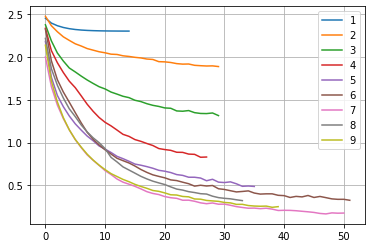

In [45]:
clfTotal=[]
clfScoreTrain=[]
clfScoreTest=[]
for i in range(1,10):
  clf=train_multi(i,True)
  loss_values = clf.loss_curve_
  plt.plot(clf.loss_curve_,label=str(i))
  plt.grid()
  plt.legend()
  clfScoreTrain.append(clf.score(X_train,y_train))
  clfScoreTest.append(clf.score(X_test,y_test))
  print("final cost : {} / it = {}".format(loss_values[-1],len(loss_values)))

In [46]:
for i in range(0,len(clfScoreTrain)):
  print("i={} train score={}\t test score={}".format(i+1,clfScoreTrain[i],clfScoreTest[i]))

i=1 train score=0.10898965791567224	 test score=0.07962962962962963
i=2 train score=0.20843277645186953	 test score=0.16666666666666666
i=3 train score=0.4407319013524264	 test score=0.37222222222222223
i=4 train score=0.7064439140811456	 test score=0.6611111111111111
i=5 train score=0.8838504375497216	 test score=0.8425925925925926
i=6 train score=0.9069212410501193	 test score=0.8462962962962963
i=7 train score=0.960222752585521	 test score=0.9111111111111111
i=8 train score=0.9172633253778838	 test score=0.825925925925926
i=9 train score=0.9180588703261734	 test score=0.8648148148148148


final cost : 0.48926788801795457 / it = 27
final cost : 0.2870832554969116 / it = 64
final cost : 0.343266552562954 / it = 40
final cost : 0.32298924974819376 / it = 69
final cost : 0.3294713540462552 / it = 31
final cost : 0.5304108891409316 / it = 41
final cost : 0.20581074712296893 / it = 58
final cost : 0.2856161252224553 / it = 53
final cost : 0.5721457471813449 / it = 32
Train mean:0.8976398833200743 var:0.001614295927953288
Test mean:0.8353909465020576 var:0.0011282155497976257


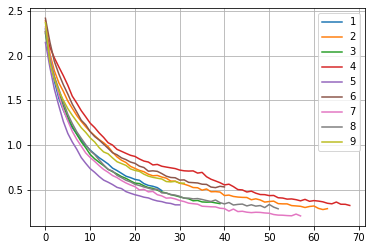

In [47]:
clfTotal=[]
clfScoreTrain=[]
clfScoreTest=[]
for i in range(1,10):
  clf=train_multi(7,True)
  loss_values = clf.loss_curve_
  plt.plot(clf.loss_curve_,label=str(i))
  plt.grid()
  plt.legend()
  clfScoreTrain.append(clf.score(X_train,y_train))
  clfScoreTest.append(clf.score(X_test,y_test))
  print("final cost : {} / it = {}".format(loss_values[-1],len(loss_values)))
print("Train mean:{} var:{}".format(np.mean(clfScoreTrain),np.var(clfScoreTrain)))
print("Test mean:{} var:{}".format(np.mean(clfScoreTest),np.var(clfScoreTest)))

4.Rejet

In [48]:
def argmax_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_masked = np.ma.array(y_argmax, mask=(np.amax(y, axis=1) < threshold))
    return y_masked.filled(-1)
 
def argmax_top2_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_top2 = np.sort(y, axis=1)[:,-1:-3:-1]
    y_masked = np.ma.array(y_argmax, mask=((y_top2[:,0] - y_top2[:,1]) < threshold))
    return y_masked.filled(-1)

In [61]:
masker=argmax_reject_threshold(clf.predict_proba(X_test),0.5)
unique, counts = np.unique(masker, return_counts=True)
print("{} {}".format(len(masker),dict(zip(unique, counts))[-1]))

540 139


In [54]:
clf.predict_proba(X_test)[0]

array([0.05347985, 0.01907184, 0.00203457, 0.14625879, 0.00928612,
       0.30336012, 0.00892383, 0.01704109, 0.07262271, 0.36792107])

In [55]:
clf.predict_proba(X_test)[1]

array([0.61935784, 0.00336561, 0.01315836, 0.03425444, 0.06858694,
       0.06574598, 0.06663103, 0.0029085 , 0.00986505, 0.11612626])